In [1]:
import json
import pandas as pd

In [2]:
with open('reviews.json') as f:
    reviews = f.read().strip().split("\n")
    

In [3]:
len(reviews)

803

In [4]:
review_list = pd.DataFrame(columns = json.loads(reviews[0]))

In [5]:
for review in reviews:
    one = json.loads(review)
    review_list.loc[-1] = [one['name'],one['date'],one['text'],one['score']]
    review_list.index = review_list.index + 1
    review_list = review_list.sort_index()

In [6]:
review_list

,name,date,text,score
0,Heather,2018-04-08 00:00:00,When I click the button it shines brightly,5.0
1,smokey,2018-04-08 00:00:00,i have to buy batteries china junk,1.0
2,Susan,2018-04-07 00:00:00,Arrived on time and product is as depicted. G...,5.0
3,JiaHui Chen,2018-04-07 00:00:00,"This is a small iron flashlight, it is very co...",5.0
4,Amazon Customer,2018-04-07 00:00:00,Awesome flashlight for the price!,5.0
5,Atlanta Jake,2018-04-07 00:00:00,Got these two flashlights on sale and well wor...,5.0
6,An N.,2018-04-07 00:00:00,Decent enough light. But I hated the fact that...,2.0
7,MW,2018-04-06 00:00:00,It’s tiny cute flashlight. As of luminous flu...,5.0
8,Nicholas Kisling,2018-04-06 00:00:00,Better than I was expecting for the price and ...,4.0
9,Jing Zhang,2018-04-06 00:00:00,This is one of the must haves for each and eve...,5.0


In [7]:
#detect fake reviews
review_list['text length'] = review_list['text'].apply(lambda x: len(x.split()))
review_list['name length'] = review_list['name'].apply(lambda x: len(x.split()))

In [8]:
full_star_review = review_list[(review_list.score == 5.0)]

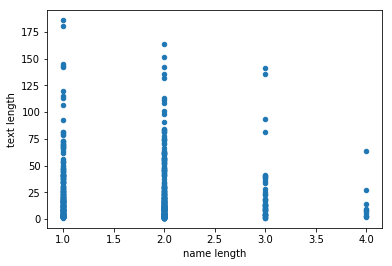

In [11]:
full_star_review.plot.scatter(x='name length', y='text length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B92481C828>,
      dtype=object)

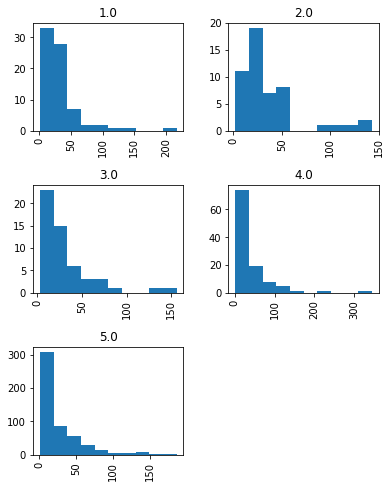

In [12]:
review_list['text length'].hist(by = review_list['score'], figsize = (6,8))

In [13]:
pd.value_counts(review_list['score'])

5.0    516
4.0    109
1.0     75
3.0     53
2.0     50
Name: score, dtype: int64

In [14]:
review_list['text length'].describe()

count    803.000000
mean      28.926526
std       34.411523
min        1.000000
25%        7.000000
50%       17.000000
75%       38.000000
max      345.000000
Name: text length, dtype: float64

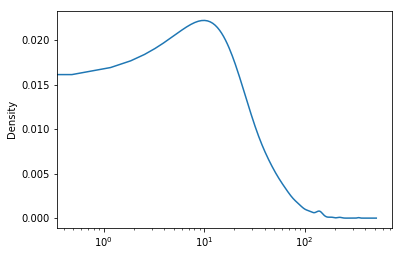

In [16]:
review_list['text length'].plot(kind='kde', logx=True)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

In [20]:
import spacy

nlp = spacy.load('en')

In [52]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True, stop_words='english',)
posf = PartOfSpeechFilter()


In [64]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                    ])
pipeline.set_params(**{'posf__stop_words': None})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)


Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=None)), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_...   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [65]:
preproc_reviews = pipeline.fit_transform(review_list.text)

In [66]:
preproc_reviews 

<803x173 sparse matrix of type '<class 'numpy.int64'>'
	with 5819 stored elements in Compressed Sparse Row format>

In [67]:
sum_across_rows = preproc_reviews.sum(axis=1)
print('Shape of result: ', sum_across_rows.shape)

Shape of result:  (803, 1)


In [68]:
sum_across_rows[:10]

matrix([[ 2],
        [ 2],
        [13],
        [12],
        [ 3],
        [19],
        [ 6],
        [ 9],
        [19],
        [ 6]], dtype=int64)

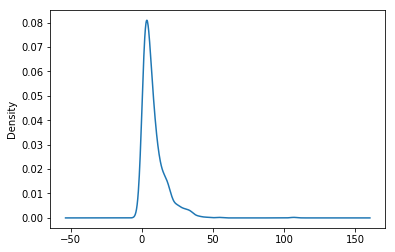

In [69]:
pd.Series(sum_across_rows.A1).plot(kind='kde')#Return self as a flattened array

In [70]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 173)

In [71]:
pipe_cv = pipeline.named_steps['cv']
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))

In [72]:
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('flashlight', 394),
 ('light', 383),
 ('pron', 326),
 ('bright', 304),
 ('great', 237),
 ('work', 212),
 ('battery', 206),
 ('good', 193),
 ('use', 169),
 ('small', 150)]

In [73]:
#flashlight should be removed, because these reviews are all about flashlight
#remove pron,because for word i, it, its, t.lemma_ will return pron

In [115]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                   ])

pipeline.set_params(**{'posf__stop_words': {'flashlight','-PRON-'}})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews = pipeline.fit_transform(review_list.text)

In [120]:
preproc_reviews.shape

(803, 171)

In [121]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 171)

In [122]:
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('lens', 383),
 ('bright', 304),
 ('good', 237),
 ('weight', 212),
 ('battery', 206),
 ('glove', 193),
 ('try', 169),
 ('single', 150),
 ('like', 117),
 ('press', 112)]

In [130]:
type(review_list.score.values)

numpy.ndarray

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr = LogisticRegression()

lr.fit(preproc_reviews, review_list.score.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(review_list.score.values, lr.predict(preproc_reviews))

In [135]:
conf_matrix

array([[ 54,   0,   0,   4,  17],
       [  8,  27,   0,   1,  14],
       [  2,   0,  16,   5,  30],
       [  2,   0,   0,  40,  67],
       [  2,   1,   1,   5, 507]], dtype=int64)

In [136]:
lr.score(preproc_reviews, review_list.score.values)

0.8019925280199253

In [137]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [148]:
fs_chi2 = SelectKBest(chi2, k=150)
X_kbest = fs_chi2.fit_transform(preproc_reviews.toarray(), review_list.score.values)

In [149]:
X_kbest.shape

(803, 150)

In [150]:
lr.fit(X_kbest, review_list.score.values)
lr.score(X_kbest, review_list.score.values)

0.7945205479452054

In [151]:
from sklearn.model_selection import cross_validate

In [152]:
scores = cross_validate(lr, preproc_reviews, review_list.score.values, cv=10, 
                        scoring=['f1', 'precision', 'recall', 'accuracy'],
                        return_train_score=True
                       )
scores

ValueError: Target is multiclass but average='binary'. Please choose another average setting.